#  Homework - Data Cleaning

##  Making Sense of Disaster

For this homework, we'll be making use of the `titanic` dataset.  This dataset provides a number of attributes about each paying passenger on the https://en.m.wikipedia.org/wiki/RMS_Titanic along with whether that passenger is known to have survived the disaster.

In [4]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [90]:
import pandas as pd
import numpy as np
df['deck'].dropna().shape

(203,)

##  Task - Document each column

This includes datatype, interpretation of values, units, information about collection procedures, etc.

In [6]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset('titanic')
# df.head()
for col in df.columns:
    vals = None
    units = None
    coll = None
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        for num in df[col]:
            if num%1 != 0:
                vals = 'measured'
                units = 'base'
            elif num%1 == 0:
                vals = 'counted'
                units = 'counts'
            else:
                print('Some value is weird')
    elif df[col].dtype == 'object' or df[col].dtype == 'category':
        vals = 'classifier'
        units = 'N/A'
    elif df[col].dtype == 'bool':
        vals = 'boolean'
        units = 'N/A'
    else:
        print('Some column is weird')
    if df[col].dropna().shape[0] != df.shape[0]:
        coll = 'partially'
    elif df[col].dropna().shape[0] == df.shape[0]:
        coll = 'fully'
    else:
        print('Some shape is weird')
    print('The column %s contains'%col,'data of type: %s'%df[col].dtype)
    print('The values in column %s are'%col,vals)
    print('The units for column %s are'%col,units)
    print('The values in column %s were'%col,'%s collected'%coll)

The column survived contains data of type: int64
The values in column survived are counted
The units for column survived are counts
The values in column survived were fully collected
The column pclass contains data of type: int64
The values in column pclass are counted
The units for column pclass are counts
The values in column pclass were fully collected
The column sex contains data of type: object
The values in column sex are classifier
The units for column sex are N/A
The values in column sex were fully collected
The column age contains data of type: float64
The values in column age are counted
The units for column age are counts
The values in column age were partially collected
The column sibsp contains data of type: int64
The values in column sibsp are counted
The units for column sibsp are counts
The values in column sibsp were fully collected
The column parch contains data of type: int64
The values in column parch are counted
The units for column parch are counts
The values in c

TypeError: data type "category" not understood

In [7]:
df.shape

(891, 15)

In [17]:
# for col in df.columns:
#     print(col,'is full of',df[col].dtype)
    
df['fare'].dtype=='int64'
# the different data types are as follows:
#  int64, object, float64, category, bool

False

## Task - Perform a Univariate Analysis on each column

Remember, we want:
* a distribution for each numeric column
* a five-number summary for each numeric column
* a set of counts for each categorical column
* a countplot for each categorical column
* a report on the fraction of missing data (`NaN`, `None`, `''`, etc.) for each column.

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64


C:\Users\J20032\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


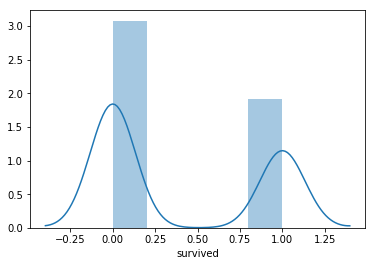

In [23]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

df = sns.load_dataset('titanic')
# for col in df.columns:
#     if df[col].dtype == 'int64' or df[col].dtype == 'float64':
#         i=sns.distplot(df[col].dropna())

## Honestly, I didn't know how to plot multiple distributions when
## using a for loop, so this is the bare bones script I wrote for this

## univariate for survived
a = sns.distplot(df.survived.dropna())
print(df.survived.describe())

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: pclass, dtype: float64


C:\Users\J20032\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


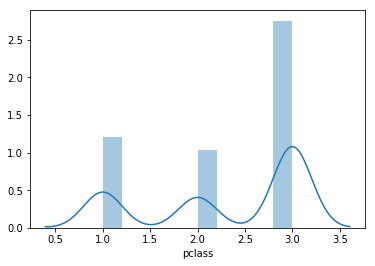

In [25]:
## univariate for pclass
b = sns.distplot(df.pclass.dropna())
print(df.pclass.describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


C:\Users\J20032\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


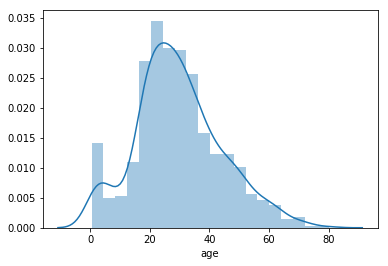

In [26]:
## univariate for age
c = sns.distplot(df.age.dropna())
print(df.age.describe())

C:\Users\J20032\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: sibsp, dtype: float64


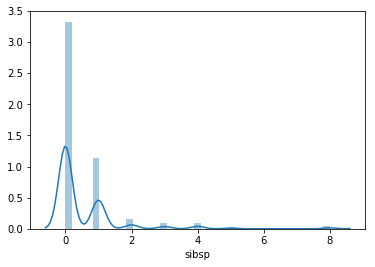

In [27]:
## univariate for sibsp
d = sns.distplot(df.sibsp.dropna())
print(df.sibsp.describe())

C:\Users\J20032\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: parch, dtype: float64


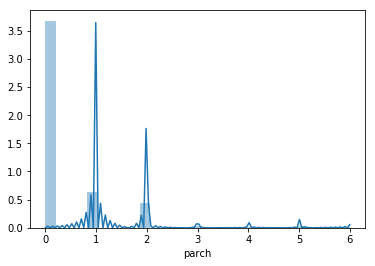

In [28]:
## univariate for parch
e = sns.distplot(df.parch.dropna())
print(df.parch.describe())

C:\Users\J20032\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


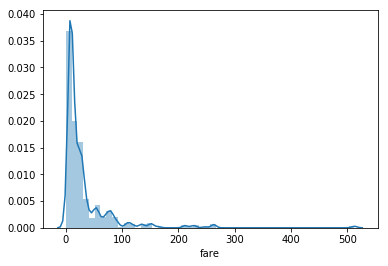

In [29]:
## univariate for fare
f = sns.distplot(df.fare.dropna())
print(df.fare.describe())

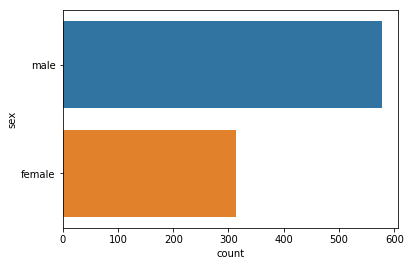

In [32]:
## countplot for sex
sns.countplot(data=df, y='sex')

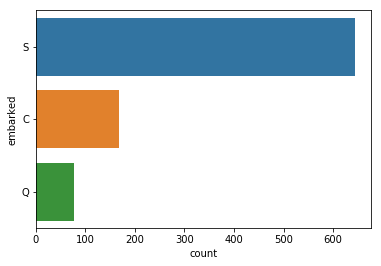

In [33]:
## countplot for embarked
sns.countplot(data=df, y='embarked')

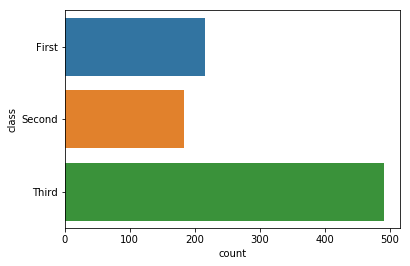

In [34]:
## countplot for class
sns.countplot(data=df, y='class')

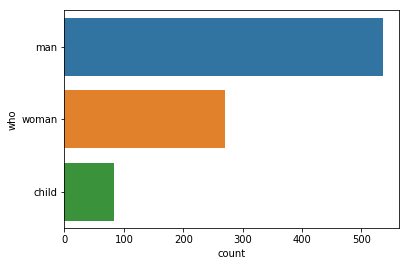

In [35]:
## countplot for who
sns.countplot(data=df, y='who')

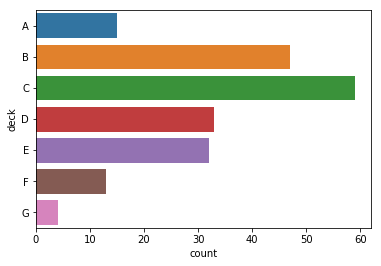

In [36]:
## countplot for deck
sns.countplot(data=df, y='deck')

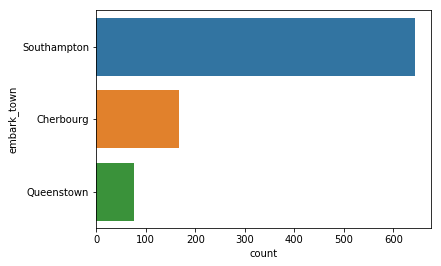

In [37]:
## countplot for embark_town
sns.countplot(data=df, y='embark_town')

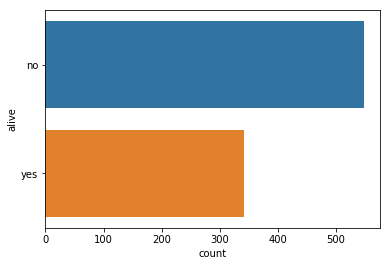

In [38]:
## countplot for alive
sns.countplot(data=df, y='alive')

In [51]:
## fractions of missing data

for col in df.columns:
    print('%s has a fraction of missing data equal to'%col,(1-(df[col].dropna().shape[0]/df[col].shape[0])))

survived has a fraction of missing data equal to 0.0
pclass has a fraction of missing data equal to 0.0
sex has a fraction of missing data equal to 0.0
age has a fraction of missing data equal to 0.19865319865319864
sibsp has a fraction of missing data equal to 0.0
parch has a fraction of missing data equal to 0.0
fare has a fraction of missing data equal to 0.0
embarked has a fraction of missing data equal to 0.002244668911335568
class has a fraction of missing data equal to 0.0
who has a fraction of missing data equal to 0.0
adult_male has a fraction of missing data equal to 0.0
deck has a fraction of missing data equal to 0.7721661054994389
embark_town has a fraction of missing data equal to 0.002244668911335568
alive has a fraction of missing data equal to 0.0
alone has a fraction of missing data equal to 0.0


## Task - Perform a multivariate analysis to compare columns against each other.



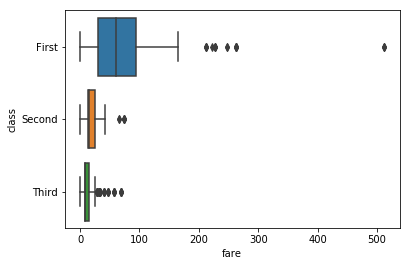

In [67]:
sns.boxplot(data=df,y='class',x='fare')

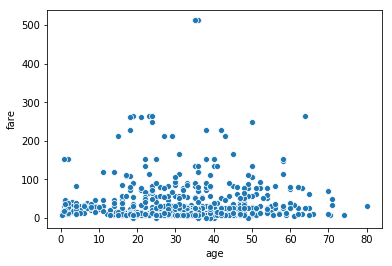

In [64]:
sns.scatterplot(data=df,y='fare',x='age')

## Task - Identify outliers in quantitative columns

Identify any outliers and (a) implement some handling of them and (b) describe and justify your choice.

In [72]:
## outliers for survived
surv_out = df.survived[np.abs(df.survived - df.survived.mean()) > 3*df.survived.std()]
print(surv_out)

Series([], Name: survived, dtype: int64)


In [73]:
## outliers for pclass
pclass_out = df.pclass[np.abs(df.pclass - df.pclass.mean()) > 3*df.pclass.std()]
print(pclass_out)

Series([], Name: pclass, dtype: int64)


In [74]:
## outliers for age
age_out = df.age[np.abs(df.age - df.age.mean()) > 3*df.age.std()]
print(age_out)

## these outliers should be kept in the dataset. They are pertinent information and are not enough to skew results

630    80.0
851    74.0
Name: age, dtype: float64


In [75]:
## outliers for sibsp
sibsp_out = df.sibsp[np.abs(df.sibsp - df.sibsp.mean()) > 3*df.sibsp.std()]
print(sibsp_out)

16     4
50     4
59     5
68     4
71     5
119    4
159    8
164    4
171    4
180    8
182    4
201    8
233    4
261    4
266    4
278    4
324    8
386    5
480    5
541    4
542    4
683    5
686    4
787    4
792    8
813    4
824    4
846    8
850    4
863    8
Name: sibsp, dtype: int64


In [76]:
## outliers for survived
parch_out = df.parch[np.abs(df.parch - df.parch.mean()) > 3*df.parch.std()]
print(parch_out)

13     5
25     5
86     3
167    4
360    4
437    3
438    4
567    4
610    5
638    5
678    6
736    3
774    3
858    3
885    5
Name: parch, dtype: int64


In [93]:
## outliers for fare
fare_out = df.fare[np.abs(df.fare - df.fare.mean()) > 3*df.fare.std()]
print(fare_out)

## these outliers should be removed, similar to how income is measured, where pertinent values are the medians

df[np.abs(df.fare-df.fare.mean()) <= (3*df.fare.std())]

27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: fare, dtype: float64


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## Task - Identify any redundant columns

Are any of the columns redundant?  Or do they capture the same information?  If so, document them and decide if you want to keep both or just one in the final tidy dataset.

In [ ]:
## none of the columns are redundant

## Task - Produce a long-form tidy dataframe

Hint:  You may need to add a new column to uniquely identify each passenger.

In [97]:
df['id'] = df.index
melts = df.melt(id_vars=['id'])
melts

,id,variable,value
0,0,survived,0
1,1,survived,1
2,2,survived,1
3,3,survived,1
4,4,survived,0
5,5,survived,0
6,6,survived,0
7,7,survived,0
8,8,survived,1
9,9,survived,1


In [1]:
############ THE REST OF THIS IS FOR TESTING PURPOSES ##########

In [10]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [14]:
for col in df.columns:
    print(col, df[col].dtype)

survived int64
pclass int64
sex object
age float64
sibsp int64
parch int64
fare float64
embarked object
class category
who object
adult_male bool
deck category
embark_town object
alive object
alone bool
